# Polinomial Models

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
# Sample dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [50, 65, 75, 80, 85, 88, 89, 88, 85, 80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

In [20]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']].values  # (n, 1)
y = df['Exam_Score'].values     # (n,)

In [41]:
# Fit linear regression for comparison
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred_lin = lin_reg.predict(X)

# Fit polynomial regression
poly_degree = 2
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('lin', LinearRegression())
])
poly_model.fit(X, y)

y_pred_poly = poly_model.predict(X)

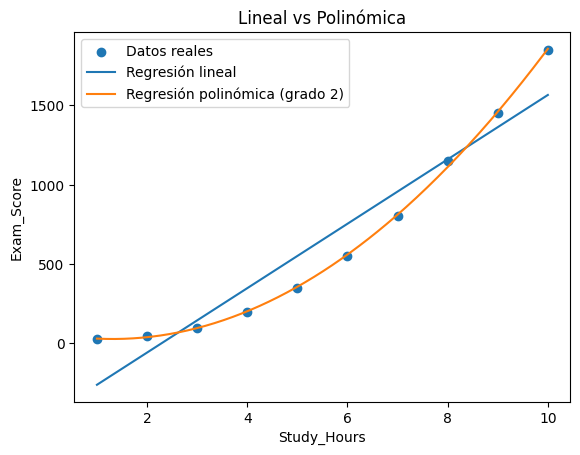

{'Lineal': {'R2': 0.9157568709052806, 'RMSE': np.float64(176.74240800633785)},
 'Polinómica (grado 2)': {'R2': 0.999440204264152,
  'RMSE': np.float64(14.40748963476145)}}

In [42]:
# Plot results
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot_lin = lin_reg.predict(X_plot)
y_plot_poly = poly_model.predict(X_plot)

plt.figure()
plt.scatter(X, y, label='Datos reales')
plt.plot(X_plot, y_plot_lin, label='Regresión lineal')
plt.plot(X_plot, y_plot_poly, label=f'Regresión polinómica (grado {poly_degree})')
plt.xlabel('Study_Hours')
plt.ylabel('Exam_Score')
plt.legend()
plt.title('Lineal vs Polinómica')
plt.show()

# Evaluate the models
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics = {
    'Lineal': {
        'R2': r2_score(y, y_pred_lin),
        'RMSE': rmse(y, y_pred_lin)
    },
    f'Polinómica (grado {poly_degree})': {
        'R2': r2_score(y, y_pred_poly),
        'RMSE': rmse(y, y_pred_poly)
    }
}
metrics

# Exponential regression

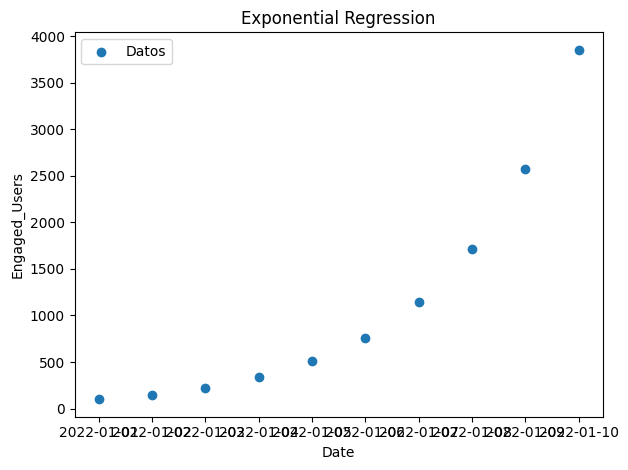

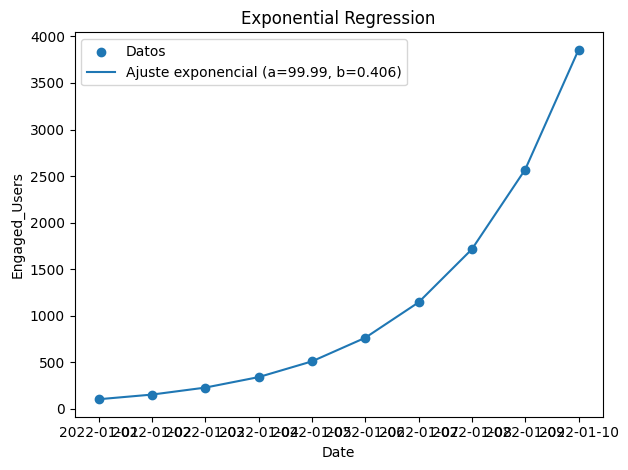

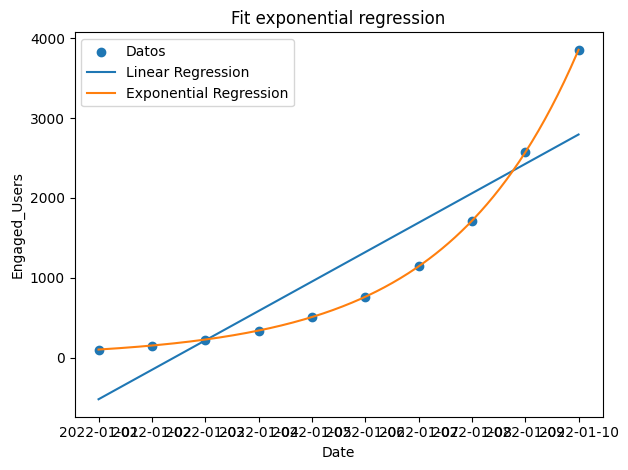

Linear Regression MSE: 261371.2533
Exponential Regression MSE: 0.3846
Exponential params -> a: 99.991146, b: 0.405836


In [35]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100, 150, 225, 338, 507, 761, 1142, 1713, 2570, 3855]
}

# Create a DataFrame from the dataset
df_exp = pd.DataFrame(data)
df_exp = df_exp.drop_duplicates(subset=['Date','Engaged_Users']).copy()
df_exp['Date'] = pd.to_datetime(df_exp['Date'])
df_exp['Engaged_Users'] = pd.to_numeric(df_exp['Engaged_Users'], errors='coerce')
df_exp = df_exp.dropna(subset=['Date','Engaged_Users']).sort_values('Date').reset_index(drop=True)

# Extract the features (Date) and target (Engaged_Users)
t0 = df_exp['Date'].min()
X_exp = (df_exp['Date'] - t0).dt.days.values.reshape(-1, 1)
y_exp = df_exp['Engaged_Users'].astype(float).values

# Visualize the data
plt.figure()
plt.scatter(df_exp['Date'], y_exp, label='Datos')
plt.xlabel('Date')
plt.ylabel('Engaged_Users')
plt.title('Exponential Regression')
plt.legend()
plt.tight_layout()
plt.show()

# Fit linear regression for comparison
lin_time = LinearRegression().fit(X_exp, y_exp)
y_lin_time = lin_time.predict(X_exp)

# Fit exponential regression
mask = y_exp > 0
reg = LinearRegression().fit(X_exp[mask], np.log(y_exp[mask]))
b = reg.coef_[0]
a = np.exp(reg.intercept_)
exp_pred = a * np.exp(b * X_exp.ravel())

# Gráfica 1: Exponential Regression (conservada)
plt.figure()
plt.scatter(df_exp['Date'], y_exp, label='Datos')
plt.plot(df_exp['Date'], exp_pred, label=f'Ajuste exponencial (a={a:.2f}, b={b:.3f})')
plt.xlabel('Date')
plt.ylabel('Engaged_Users')
plt.title('Exponential Regression')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfica 2: Fit exponential regression (comparativa lineal vs exponencial)
days_grid = np.linspace(X_exp.min(), X_exp.max(), 300).reshape(-1, 1)
y_lin_grid = lin_time.predict(days_grid)
y_exp_grid = a * np.exp(b * days_grid.ravel())

plt.figure()
plt.scatter(df_exp['Date'], y_exp, label='Datos')
plt.plot(t0 + pd.to_timedelta(days_grid.ravel(), unit='D'), y_lin_grid, label='Linear Regression')
plt.plot(t0 + pd.to_timedelta(days_grid.ravel(), unit='D'), y_exp_grid, label='Exponential Regression')
plt.xlabel('Date')
plt.ylabel('Engaged_Users')
plt.title('Fit exponential regression')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the models
lin_mse = mean_squared_error(y_exp, y_lin_time)
exp_mse = mean_squared_error(y_exp, exp_pred)
print(f'Linear Regression MSE: {lin_mse:.4f}')
print(f'Exponential Regression MSE: {exp_mse:.4f}')
print(f'Exponential params -> a: {a:.6f}, b: {b:.6f}')


# Power models

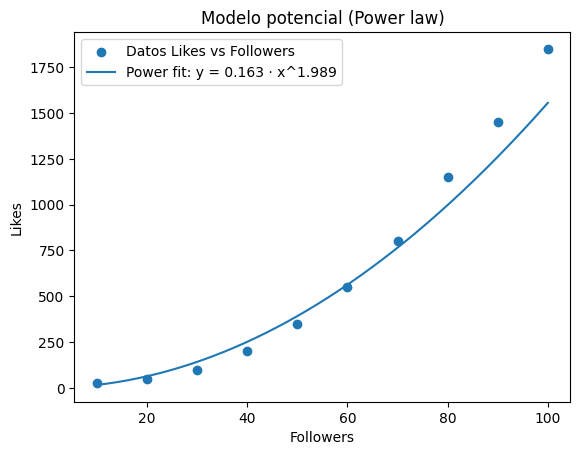

In [36]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Likes': [25, 50, 100, 200, 350, 550, 800, 1150, 1450, 1850],
    'Shares': [5, 10, 20, 35, 70, 110, 160, 220, 290, 370],
    'Comments': [2, 4, 8, 14, 28, 44, 64, 88, 116, 148]
}
df_pow = pd.DataFrame(data)

# Perform power regression for Likes as an example
mask = (df_pow['Followers'] > 0) & (df_pow['Likes'] > 0)
x = df_pow.loc[mask, 'Followers'].astype(float).values.reshape(-1, 1)
y = df_pow.loc[mask, 'Likes'].astype(float).values

X_log = np.log(x)
y_log = np.log(y)

lin_power = LinearRegression()
lin_power.fit(X_log, y_log)

alpha = lin_power.coef_[0]
ln_k = lin_power.intercept_
k = np.exp(ln_k)

y_pred_power = k * (x.ravel() ** alpha)
r2_power = r2_score(y, y_pred_power)
rmse_power = np.sqrt(mean_squared_error(y, y_pred_power))

alpha, k, r2_power, rmse_power



# Generate a range of Followers values for the fitted curve
x_grid = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
y_grid = k * (x_grid.ravel() ** alpha)

# Calculate the predicted Likes using the fitted parameters
y_pred_power = k * (x.ravel() ** alpha)

# Create a plot to visualize the relationship
plt.figure()
plt.scatter(x, y, label='Datos Likes vs Followers')
plt.plot(x_grid, y_grid, label=f'Power fit: y = {k:.3g} · x^{alpha:.3f}')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.legend()
plt.title('Modelo potencial (Power law)')
plt.show()

